In [2]:
json_file_path1 = '/home/deepb/Desktop/AIDS/project/ap-10k/annotations/ap10k-train-split1.json'
json_file_path2 = '/home/deepb/Desktop/AIDS/project/ap-10k/annotations/ap10k-train-split2.json'
json_file_path3 = '/home/deepb/Desktop/AIDS/project/ap-10k/annotations/ap10k-train-split3.json'

In [3]:
import json

# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Load JSON data from each file
data1 = load_json(json_file_path1)
data2 = load_json(json_file_path2)
data3 = load_json(json_file_path3)

# Combine the dictionaries
combined_data = {**data1, **data2, **data3}

print(len(combined_data))

5


In [4]:
print(combined_data.keys())

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [5]:
print(combined_data['images'][0])
print(combined_data['annotations'][0])
print(combined_data['categories'][0])

{'license': 1, 'id': 116, 'file_name': '000000000116.jpg', 'width': 1024, 'height': 768, 'background': 1}
{'id': 130, 'image_id': 116, 'category_id': 1, 'bbox': [214, 138, 656, 474], 'area': 310944, 'iscrowd': 0, 'num_keypoints': 16, 'keypoints': [0, 0, 0, 796, 210, 2, 850, 262, 2, 629, 284, 2, 324, 298, 2, 614, 388, 2, 654, 424, 2, 661, 534, 2, 580, 385, 2, 569, 469, 2, 560, 572, 2, 402, 403, 2, 373, 469, 2, 447, 574, 2, 357, 385, 2, 281, 455, 2, 234, 576, 2]}
{'id': 1, 'name': 'antelope', 'supercategory': 'Bovidae', 'keypoints': ['left_eye', 'right_eye', 'nose', 'neck', 'root_of_tail', 'left_shoulder', 'left_elbow', 'left_front_paw', 'right_shoulder', 'right_elbow', 'right_front_paw', 'left_hip', 'left_knee', 'left_back_paw', 'right_hip', 'right_knee', 'right_back_paw'], 'skeleton': [[1, 2], [1, 3], [2, 3], [3, 4], [4, 5], [4, 6], [6, 7], [7, 8], [4, 9], [9, 10], [10, 11], [5, 12], [12, 13], [13, 14], [5, 15], [15, 16], [16, 17]]}


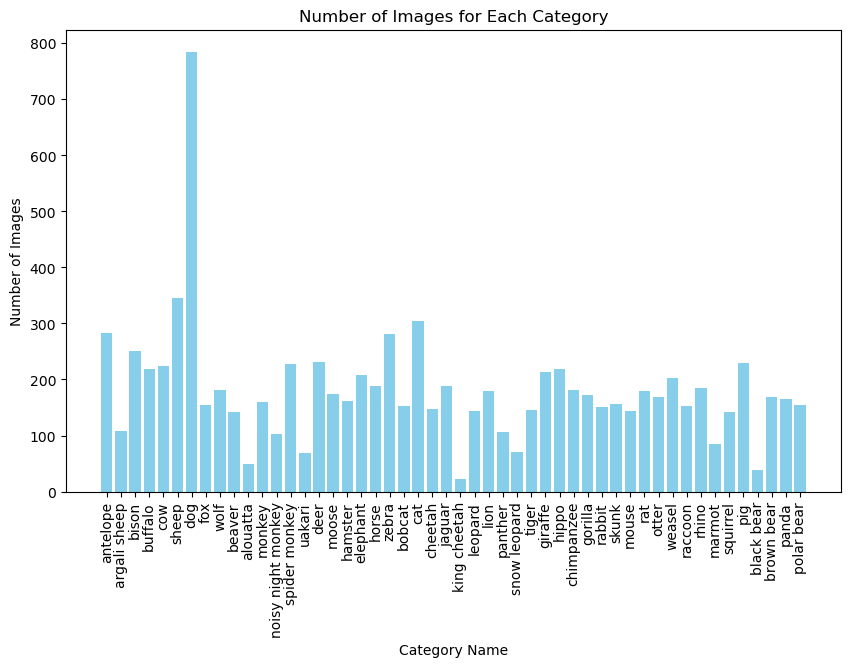

In [7]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Create a dictionary to map category id to category name
category_id_to_name = {category['id']: category['name'] for category in combined_data['categories']}

# Create a dictionary to count the number of images for each category id
category_image_count = defaultdict(int)

# Iterate through annotations and count the images for each category id
for annotation in combined_data['annotations']:
    category_id = annotation['category_id']
    category_image_count[category_id] += 1

# Extract category names and their corresponding image counts
category_names = [category_id_to_name[category_id] for category_id in category_image_count.keys()]
image_counts = list(category_image_count.values())

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(category_names, image_counts, color='skyblue')
plt.xlabel('Category Name')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Category')
plt.xticks(rotation=90)
plt.show()

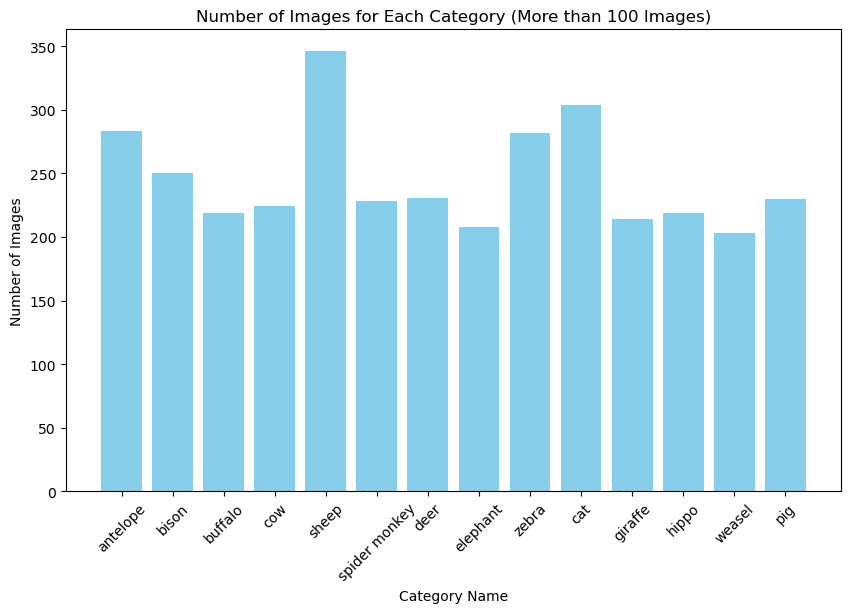

In [12]:
# Filter categories with more than 100 images
filtered_category_image_count = {category_id: count for category_id, count in category_image_count.items() if count > 200 and count < 400}

# Extract filtered category names and their corresponding image counts
filtered_category_names = [category_id_to_name[category_id] for category_id in filtered_category_image_count.keys()]
filtered_image_counts = list(filtered_category_image_count.values())

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.bar(filtered_category_names, filtered_image_counts, color='skyblue')
plt.xlabel('Category Name')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Category (More than 100 Images)')
plt.xticks(rotation=45)
plt.show()

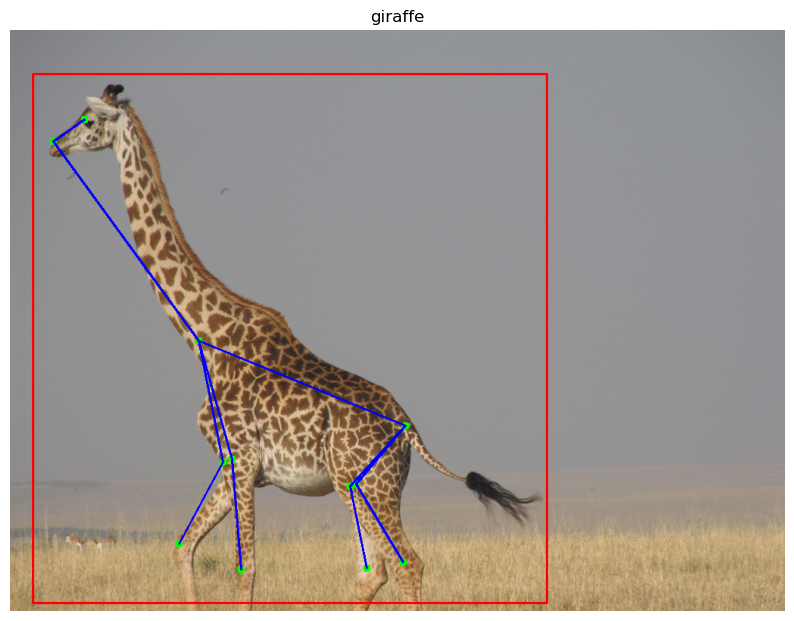

[[1, 2], [1, 3], [2, 3], [3, 4], [4, 5], [4, 6], [6, 7], [7, 8], [4, 9], [9, 10], [10, 11], [5, 12], [12, 13], [13, 14], [5, 15], [15, 16], [16, 17]]
[98, 119, 2, 0, 0, 0, 57, 148, 2, 249, 411, 2, 522, 523, 2, 293, 567, 2, 305, 713, 2, 0, 0, 0, 281, 571, 2, 223, 679, 2, 0, 0, 0, 457, 600, 2, 519, 703, 2, 0, 0, 0, 449, 603, 2, 471, 711, 2, 0, 0, 0]


In [82]:
import random
import cv2
import matplotlib.pyplot as plt

# Function to display an image with bounding box, keypoints, and connecting lines
def display_image_with_annotations(image_path, annotation, category_name, skeleton):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Draw bounding box
    bbox = annotation['bbox']
    cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (255, 0, 0), 2)
    
    # Draw keypoints
    keypoints = annotation['keypoints']
    for i in range(0, len(keypoints), 3):
        x, y, v = keypoints[i], keypoints[i+1], keypoints[i+2]
        if v > 0:
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
    
    # Draw lines between keypoints
    for pair in skeleton:
        pt1_index = (pair[0] - 1) * 3
        pt2_index = (pair[1] - 1) * 3
        pt1 = (keypoints[pt1_index], keypoints[pt1_index + 1])
        pt2 = (keypoints[pt2_index], keypoints[pt2_index + 1])
        if keypoints[pt1_index + 2] > 0 and keypoints[pt2_index + 2] > 0:
            cv2.line(image, pt1, pt2, (0, 0, 255), 2)
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(category_name)
    plt.axis('off')
    plt.show()

# Select a random annotation
random_annotation = random.choice(combined_data['annotations'])
image_id = random_annotation['image_id']
category_id = random_annotation['category_id']
category_name = category_id_to_name[category_id]

# Find the corresponding image file path
image_info = next(image for image in combined_data['images'] if image['id'] == image_id)
image_file_path = f"/home/deepb/Desktop/AIDS/project/ap-10k/data/{image_info['file_name']}"

# Get the skeleton from the category
skeleton = next(category['skeleton'] for category in combined_data['categories'] if category['id'] == random_annotation['category_id'])

# Display the image with annotations
display_image_with_annotations(image_file_path, random_annotation, category_name, skeleton)

# print the skeleton and keypoints of the image
print(skeleton)
print(random_annotation['keypoints'])
